# Input
The following code sections are input blocks.

Mount the google drive to take data from it

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


Input the training and validation data

In [ ]:
import cv2
import os
import glob
import numpy as np
data_path = os.path.join('/content/gdrive/My Drive/LandscapeData','*g')
files = glob.glob(data_path)
gray = []
ab = []
i = 0
for f1 in files:
    img = cv2.cvtColor(cv2.imread(f1), cv2.COLOR_BGR2LAB)
    img = cv2.resize(img, (256, 256))
    img = img.astype('float32')/255.0
    gray.append(img[:, :, 0].reshape((256, 256, 1)))
    ab.append(img[:, :, 1:])
    img = 0
    i += 1
    print(i)
    if i == 4000:
      break
gray = np.array(gray)
ab = np.array(ab)

Input the test data

In [ ]:
import cv2
import os
import glob
import numpy as np
data_path = os.path.join('/content/gdrive/My Drive/LandscapeData','*g')
files = glob.glob(data_path)
gray_test = []
ab_test = []
i = 0
for f1 in files:
  
    i += 1
    if i < 4000:
      continue
    print(i)
    img = cv2.cvtColor(cv2.imread(f1), cv2.COLOR_BGR2LAB)
    img = cv2.resize(img, (256, 256))
    img = img.astype('float32')/255.0
    gray_test.append(img[:, :, 0].reshape((256, 256, 1)))
    ab_test.append(img[:, :, 1:])
    img = 0
gray_test = np.array(gray_test)
ab_test = np.array(ab_test)

Here we test if the data has been input successfully.

Recreated image


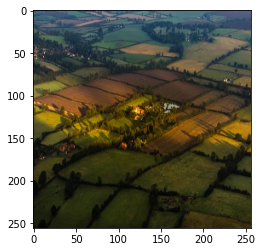

In [ ]:
import matplotlib.pyplot as plt
import cv2

n = 5

w, h, d = gray[n].shape
img = np.zeros((w, h, 3))
img[:, :, :1] = gray[n]
img[:, :, 1:] = ab[n]
img *= 255
img = img.astype('uint8')
img_ = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)

print('Recreated image')
plt.imshow(img_)
plt.show()


#Model

Define the structure of the model and compile it

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(None, None, 1), padding="same"))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu',  padding="same"))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu',  padding="same"))

model.add(layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding="same"))
model.add(layers.Conv2DTranspose(2, (3, 3), strides=2, padding="same"))

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.AUTO),
              metrics=['accuracy'])

epochs_n = 0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 1)     10        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 32)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 32)    9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 64)    3

Training the model

In [ ]:
from keras.models import load_model
train_image = gray[:3000]
train_label = ab[:3000]
test_image = gray[3000:]
test_label = ab[3000:]

checkpoint_path = "/content/gdrive/My Drive/MyCNN/"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=True)
 
epochs = 70               
# model.load_weights(checkpoint_path)

history = model.fit(train_image, train_label, epochs=epochs, validation_data=(test_image, test_label), callbacks=[cp_callback])
epochs_n += epochs
print(epochs_n)

70


Save Model

In [ ]:
model_path = "/content/gdrive/My Drive/MyCNN/FinalModel"
model_dir = os.path.dirname(model_path)
model.save(model_dir)

# Test
Load the Model

In [ ]:
import tensorflow as tf
model_path = "/content/gdrive/My Drive/MyCNN/FinalModel"
model_dir = os.path.dirname(model_path)
model = tf.keras.models.load_model(model_dir)

Visualize the output by choosing a random image n

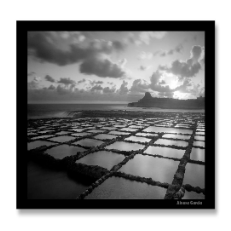

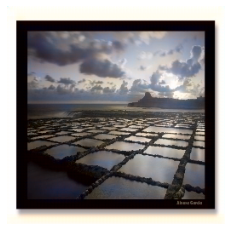

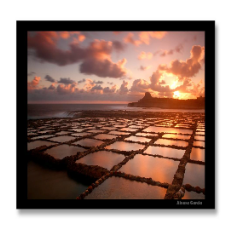

In [ ]:
import matplotlib.pyplot as plt
import cv2

n = 3462

pred = model.predict(np.array([gray[n]]))

w, h, d = gray[n].shape

img = np.zeros((w, h))
img[:, :] = gray[n].reshape((w, h))
img *= 255
img = img.astype('uint8')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

img = np.zeros((w, h, 3))
img[:, :, :1] = gray[n]
img[:, :, 1:] = pred[0]
img *= 255
img = img.astype('uint8')
img_ = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
plt.axis('off')
plt.imshow(img_)
plt.show()

img = np.zeros((w, h, 3))
img[:, :, :1] = gray[n]
img[:, :, 1:] = ab[n]
img *= 255
img = img.astype('uint8')
img_ = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
plt.axis('off')
plt.imshow(img_)
plt.show()


Calculate the test accuracy

In [ ]:
# EVALUATE
eval = model.evaluate(gray_test, ab_test, return_dict=True)
print(eval)

10/10 [==============================] - 15s 2s/step - loss: 0.0036 - accuracy: 0.6757
{'loss': 0.003559574019163847, 'accuracy': 0.6756680011749268}


Function to test images

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_model(f):

  image = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2LAB)
  image = image.astype('float32')/255.0
  w, h, d = image.shape

  gray = image[:, :, 0].reshape((w, h, 1))
  ab = image[:, :, 1:]


  pred = model.predict(np.array([gray]))
  print(pred.shape)


  img = np.zeros((w, h))
  img[:, :] = gray.reshape((w, h))
  img *= 255
  img = img.astype('uint8')
  plt.axis('off')
  plt.imshow(img, cmap='gray')
  plt.show()

  img = np.zeros((w, h, 3))
  img[:, :, :1] = gray
  img[:, :, 1:] = cv2.resize(pred[0], (h, w))
  img *= 255
  img = img.astype('uint8')
  img_ = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
  plt.axis('off')
  plt.imshow(img_)
  plt.show()

  img = np.zeros((w, h, 3))
  img[:, :, :1] = gray
  img[:, :, 1:] = ab
  img *= 255
  img = img.astype('uint8')
  img_ = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
  plt.axis('off')
  plt.imshow(img_)
  plt.show()


Test on a random image from dataset

/content/gdrive/My Drive/LandscapeData/00000531.jpg
(1, 424, 640, 2)


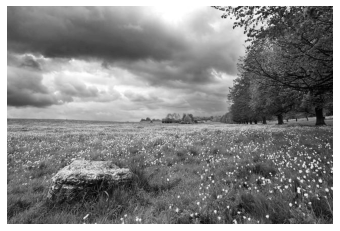

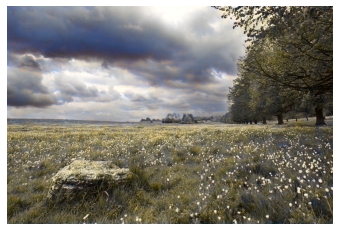

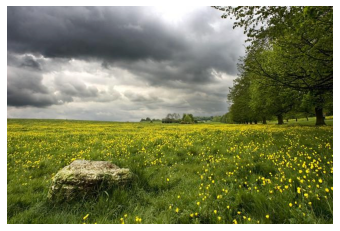

In [ ]:
import os
import glob
data_path = os.path.join('/content/gdrive/My Drive/LandscapeData','*g')
files = glob.glob(data_path)

f = files[np.random.randint(len(files))]
print(f)
apply_model(f)

Upload an image to test

Saving unnamed.jpg to unnamed (1).jpg
(1, 340, 512, 2)


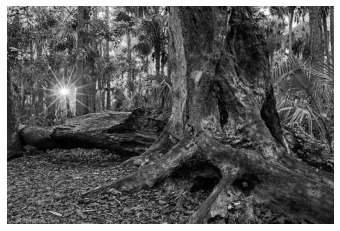

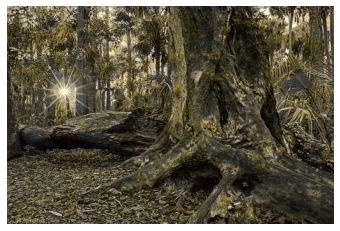

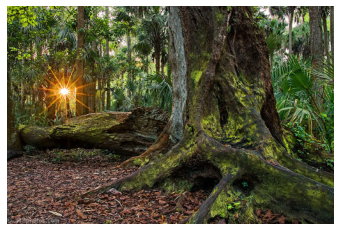

In [ ]:
from google.colab import files
uploaded = files.upload() 
f = list(uploaded.keys())[0]

apply_model(f)